In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dropdtw import drop_dtw

In [ ]:
similarity_silence = np.load('similarity.npy').T ###  Load the similarity matrix between the scripts and summary

## Not attaching code for my similarity matrix as it was quite old and very intensive

cost_matrix = 1/(similarity_silence + 1e-4)

K = similarity_silence.shape[0]
N = similarity_silence.shape[1]
cost_val = np.percentile(similarity_silence[np.nonzero(similarity_silence)],100)
cost_z= np.array([1/cost_val for i in range(N)])
cost_x = np.array([1/cost_val for i in range(K)])

[(28, 136, 1), (28, 135, 0), (27, 134, 0), (26, 133, 0), (25, 132, 1), (25, 131, 1), (25, 130, 1), (25, 129, 1), (25, 128, 1), (25, 127, 1), (25, 126, 1), (25, 125, 1), (25, 124, 1), (25, 123, 1), (25, 122, 1), (25, 121, 1), (25, 120, 1), (25, 119, 0), (24, 119, 0), (23, 119, 0), (22, 118, 1), (22, 117, 1), (22, 116, 1), (22, 115, 1), (22, 114, 1), (22, 113, 1), (22, 112, 1), (22, 111, 1), (22, 110, 1), (22, 109, 1), (22, 108, 1), (22, 107, 1), (22, 106, 1), (22, 105, 1), (22, 104, 1), (22, 103, 1), (22, 102, 1), (22, 101, 1), (22, 100, 1), (22, 99, 1), (22, 98, 1), (22, 97, 0), (21, 96, 0), (20, 95, 0), (19, 94, 1), (19, 93, 1), (19, 92, 1), (19, 91, 1), (19, 90, 1), (19, 89, 1), (19, 88, 1), (19, 87, 1), (19, 86, 1), (19, 85, 1), (19, 84, 1), (19, 83, 1), (19, 82, 1), (19, 81, 1), (19, 80, 1), (19, 79, 1), (19, 78, 1), (19, 77, 1), (19, 76, 1), (19, 75, 1), (19, 74, 1), (19, 73, 1), (19, 72, 1), (19, 71, 1), (19, 70, 1), (19, 69, 1), (19, 68, 1), (19, 67, 1), (19, 66, 1), (19, 65, 0)

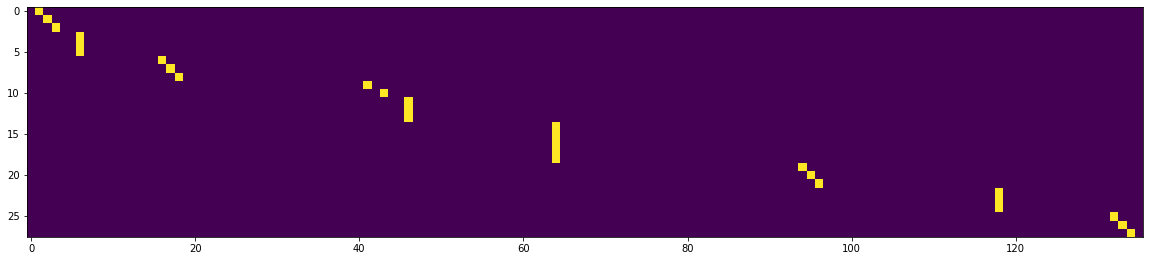

In [ ]:
final_cost,path,drops = drop_dtw(cost_matrix,cost_z,exclusive=False,contiguous=False,return_labels=False)
alignment = np.zeros((K,N))
for point in path:
    if point[2] == 0:
        alignment[point[0]-1][point[1]-1] = 1

fig,axs = plt.subplots(figsize=(20,20))   
axs.imshow(alignment)